# Petrol Prices WorldWide EDA

#### Importing Necessary Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import plotly for interactive data visualization
import plotly.express as px
import plotly.graph_objects as go

#### Reading the `Petrol Price Dataset`

In [2]:
df = pd.read_csv("Petrol Dataset June 20 2022.csv", encoding='latin-1', index_col=1)
df = df.drop(columns="#")

In [3]:
df.tail()

,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
Country,,,,,,
Saint Pierre & Miquelon,660,0.00%,1705.1,8.27,2.19,462.13
Kiribati,400,0.00%,54.5,4.09,1.08,228.42
Montserrat,400,0.00%,1231.1,4.57,1.21,255.07
Saint Helena,70,0.00%,180.2,5.53,1.46,309.21
Niue,51,0.00%,484.4,11.43,3.02,638.73


#### Checking Data's dtypes and whether their exists any null value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, United States to Niue
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Daily Oil Consumption (Barrels)  181 non-null    int64  
 1   World Share                      181 non-null    object 
 2   Yearly Gallons Per Capita        181 non-null    float64
 3   Price Per Gallon (USD)           181 non-null    float64
 4   Price Per Liter (USD)            181 non-null    float64
 5   Price Per Liter (PKR)            181 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.9+ KB


-> Dataset looks already `cleaned` but have some `mismatch` datatype (e.g. World Share) and some consumes more space

#### To `resolve` this, we are going to use `Klib` Python library.

In [5]:
import klib as kl;

#### First we are going to change `World Share` column to float by removing the `%` Sign.

In [6]:
def func(x):
    if x[-1]=="%":
        return x[:-1]
    else: return x


df["World Share"] = df["World Share"].apply(lambda x:  func(x))  
df = df.rename(columns= {"World Share" : "World Share (%)"})

In [7]:
# df = kl.convert_datatypes(df)
df["World Share (%)"] = pd.to_numeric(df["World Share (%)"])


#### Saving the current Progress into a new csv file

In [8]:
# df.to_csv("petrol_updated.csv")

#### Now Data is up to the mark to do further Analysis

In [9]:
df.head()

,Daily Oil Consumption (Barrels),World Share (%),Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
Country,,,,,,
United States,19687287,20.3,934.3,5.19,1.37,289.97
China,12791553,13.2,138.7,5.42,1.43,302.87
India,4443000,4.6,51.4,5.05,1.33,281.93
Japan,4012877,4.1,481.5,4.69,1.24,262.05
Russia,3631287,3.7,383.2,3.41,0.90,190.56


# Feature Analysis

## Univariate Analysis

In [10]:
df.describe()

,Daily Oil Consumption (Barrels),World Share (%),Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
count,1.810000e+02,181.000000,181.000000,181.000000,181.000000,181.000000
mean,5.335730e+05,0.550331,332.006630,5.695691,1.505138,318.219227
std,1.858067e+06,1.916530,436.558735,4.370484,1.154575,244.192081
min,5.100000e+01,0.000000,2.200000,0.080000,0.020000,4.650000
25%,2.003600e+04,0.020000,53.900000,4.150000,1.100000,232.020000
50%,6.161200e+04,0.060000,180.200000,5.280000,1.400000,295.040000
75%,2.623520e+05,0.300000,424.600000,6.760000,1.790000,377.740000
max,1.968729e+07,20.300000,3679.500000,54.890000,14.500000,3066.750000


### Plotting `Histogram` of every feature to check the `Normal distribution`

In [11]:
sns.set_style(style= "darkgrid")

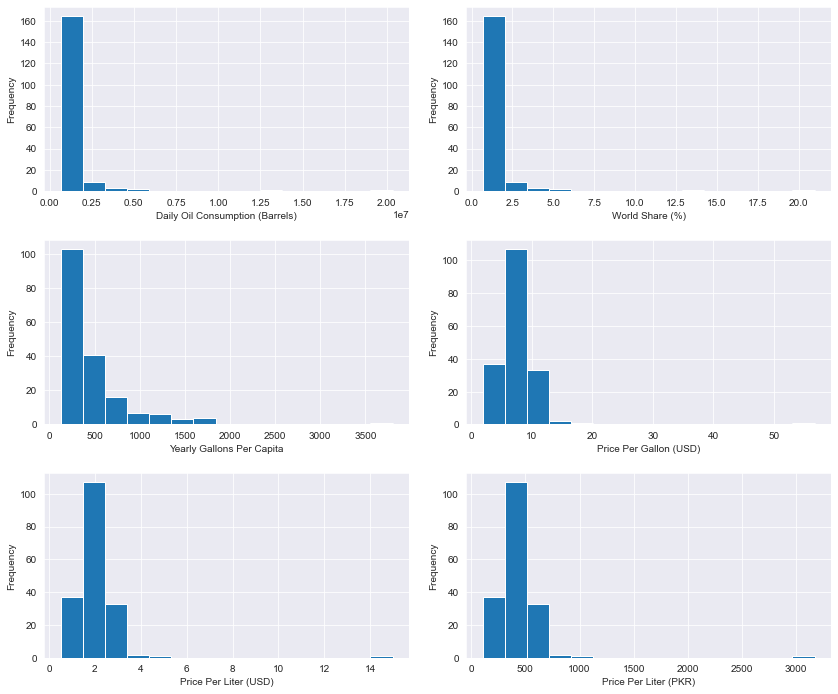

In [12]:
fig,axes = plt.subplots(3,2, figsize=(12,10))
for i,feature in enumerate(df.columns):
    axes[i//2, i%2].hist(df[feature], bins = 15, align = "right")
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel("Frequency")

plt.tight_layout(pad=2)
# plt.hist()
plt.show()

By this we can clearly see that the data features is not normally distributed. But for further testing, we will be plotting the `QQplot`

### Quantile – Quantile plot

In [13]:
import statsmodels.api as sm
import pylab as py

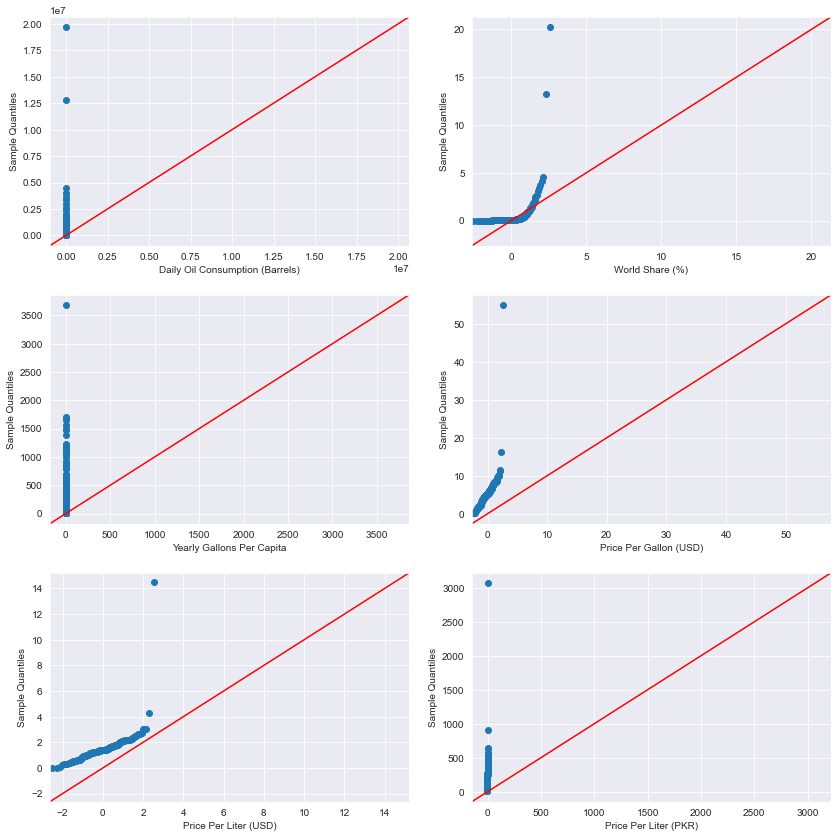

In [14]:
fig,axes = py.subplots(3,2, figsize=(12,12))

for i,feature in enumerate(df.columns):
    sm.qqplot(df[feature], line ='45', ax = axes[i//2, i%2])
    axes[i//2, i%2].set_xlabel(feature)
    py.tight_layout(pad=2)
    

so clearly, qqplot confirms that data is `not normally distributed`

## Outliers

Next we will be finding outliers and then determine whether to keep them in our dataset or not (e.g. we will look for True Outlier). We could be using two different methods.
- Box and Whisker plot (Visual method)
- Finding z-score (Statistical method)

### Box and Whisker plot

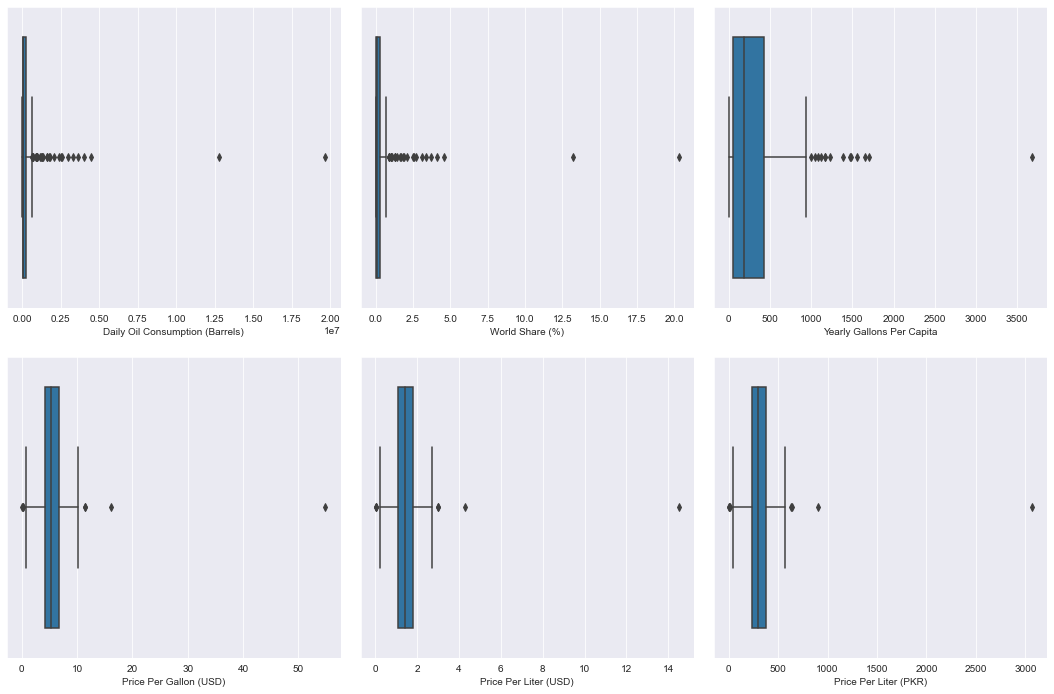

In [15]:
fig,axes = plt.subplots(2,3, figsize=(15,10))

for i,feature in enumerate(df.columns):
    plot = sns.boxplot(x = df[feature], ax = axes[i//3, i%3])
    
    axes[i//3, i%3].set_xlabel(feature)
    plt.tight_layout(pad=2)

We could see `multiple outliers` in Daily Oil Consumption column, World Share and Yearly Gallons per Capita, while too `little` in Petrol Price Column. Since we are considering petrol price very much, we will be finding outlier countries and then performing analysis between themselves later on.


## Bivariate Analysis

### Spearman's rank correlation coefficient

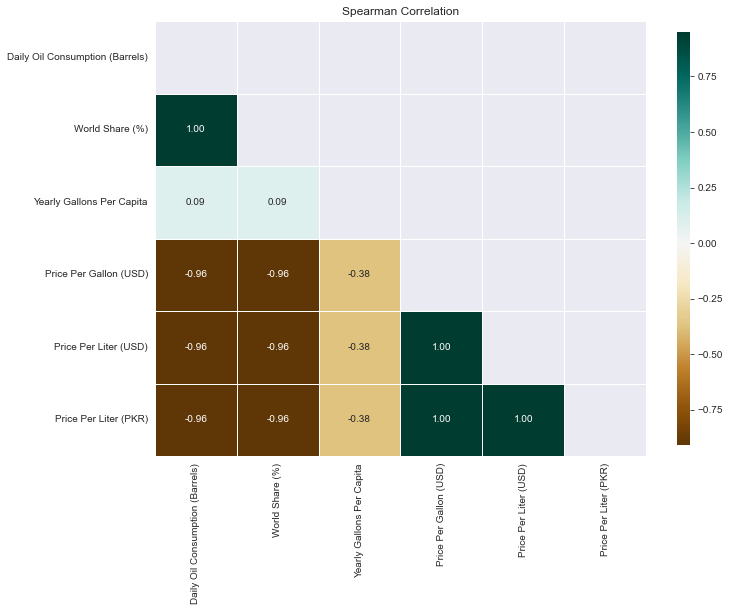

In [16]:
kl.corr_plot(df.corr(method="spearman"),figsize=(11,8))
plt.title("Spearman Correlation")
plt.show()

 Above correlation method explains us that :
- `Daily Oil Consumption` and `World Share` columns are excatly `same`, that is World Share column is directly drived from a Country's Daily Oil Consumption, Which is a obvious fact.
- we got three same columns that is `Price Per Gallon (USD)`, `Price Per Liter (USD)`, `Price Per Liter (PKR)`. For sake of space, we can remove any two redundant columns.
- Price Per Gallon (USD) is almost `inversely proportional` to the Daily Oil Consumption, that is with greater Daily oil consumption in a country, less is a fuel/oil prices in the country.  

## Data Visualization

### Pie Chart of World Share

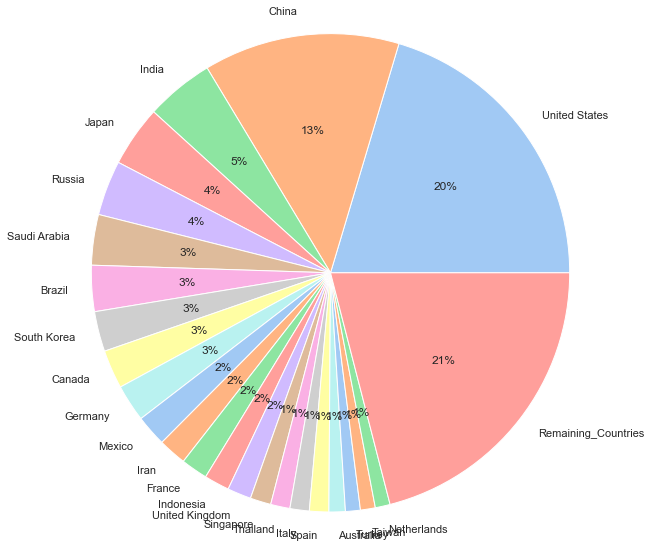

In [148]:
colors = sns.color_palette('pastel')

#create pie chart
df_world_share = df[ df["World Share (%)"] >=1]
remaining = df[ df["World Share (%)"] <1]["World Share (%)"].sum()

df_world_share = pd.concat( [df_world_share, pd.DataFrame({"World Share (%)" : remaining}, index=["Remaining_Countries"] )] )

plt.pie(df_world_share["World Share (%)"], labels = df_world_share.index, colors = colors, autopct='%.0f%%', radius=2.75)
plt.show()

### Finding Outlier Countries based on Price Per Liter(USD)

In [17]:
def find_outlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    
    interQuantile_range = q3-q1
    upper_bound = q3 + (1.5 * interQuantile_range)
    lower_bound = q1 - (1.5 * interQuantile_range)
    outlier = series[ (series<= lower_bound) | (series>= upper_bound) ]
    return outlier
    

In [18]:
outlier_country = find_outlier(df["Price Per Liter (USD)"]).index

# not_outlier_country = df[ df.apply(lambda x: x.name not in outlier_country ,axis=1) .index
not_outlier_country = [country for country in df.index if country not in outlier_country]

In [149]:
df_outlier = df.loc[outlier_country]
df_outlier.head()

,Daily Oil Consumption (Barrels),World Share (%),Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
Country,,,,,,
Iran,1803999,1.90,347.6,0.20,0.05,11.21
Venezuela,598000,0.60,307.1,0.08,0.02,4.65
Hong Kong,408491,0.40,864.5,11.35,3.00,634.29
Libya,223000,0.20,526.6,0.12,0.03,6.56
North Korea,18000,0.02,10.9,54.89,14.50,3066.75


In [82]:
df_no_outlier = df.loc[not_outlier_country]
df_no_outlier

,Daily Oil Consumption (Barrels),World Share (%),Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
Country,,,,,,
United States,19687287,20.3,934.3,5.19,1.37,289.97
China,12791553,13.2,138.7,5.42,1.43,302.87
India,4443000,4.6,51.4,5.05,1.33,281.93
Japan,4012877,4.1,481.5,4.69,1.24,262.05
Russia,3631287,3.7,383.2,3.41,0.90,190.56
...,...,...,...,...,...,...
Vanuatu,1100,0.0,60.6,4.92,1.30,274.95
Saint Pierre & Miquelon,660,0.0,1705.1,8.27,2.19,462.13
Kiribati,400,0.0,54.5,4.09,1.08,228.42


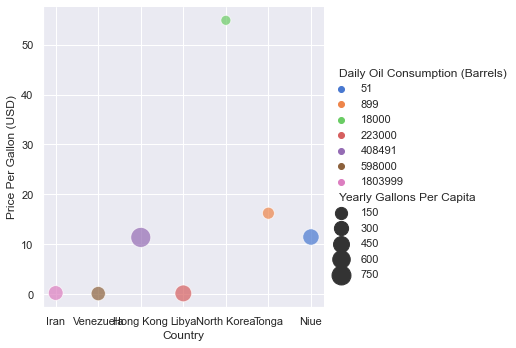

In [81]:
sns.set_style("darkgrid")
sns.relplot(data = df_outlier, x = df_outlier.index, y = "Price Per Gallon (USD)"
                , hue="Daily Oil Consumption (Barrels)"
                , size="Yearly Gallons Per Capita"
                , sizes=(100, 400)
                , height=5
               , alpha=.7
            , palette="muted"
           )
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Figure size 1080x360 with 0 Axes>

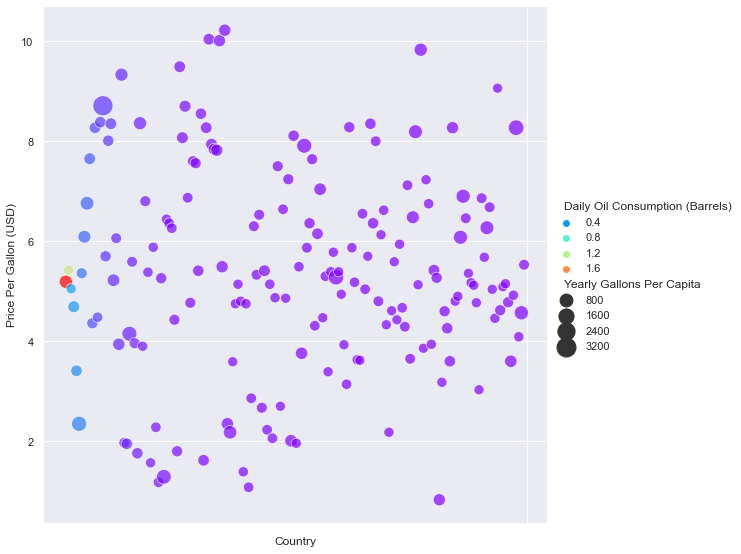

In [98]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 5))
sns.relplot(data = df_no_outlier, x = df_no_outlier.index, y = "Price Per Gallon (USD)"
                , hue="Daily Oil Consumption (Barrels)"
                , size="Yearly Gallons Per Capita"
                , sizes=(100, 400)
                , height=8
               , alpha=.7
               , palette='rainbow'
           )
plt.xticks(ticks=[""]);
# plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)